In [1]:
import math
import os
import json
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from PIL import Image

from tqdm.auto import tqdm
from pathlib import Path
%matplotlib inline

In [2]:
from zizi_pipeline import get_dataloader, TrainingConfig

In [10]:
from zizi_vae_pipeline import ZiziVaePipeline
from zizi_pipeline import ZiziPipeline
from train_v2 import make_grid

In [4]:
config = TrainingConfig("data/pink-me/", "output/blah")

In [5]:
dataloader = get_dataloader(config)
dataset = dataloader.dataset

In [6]:
def to_pil(img_t):
    return Image.fromarray(((img_t.unsqueeze(0).permute(0, 2, 3, 1) + 1.0) * 127.5).type(torch.uint8).numpy()[0])    

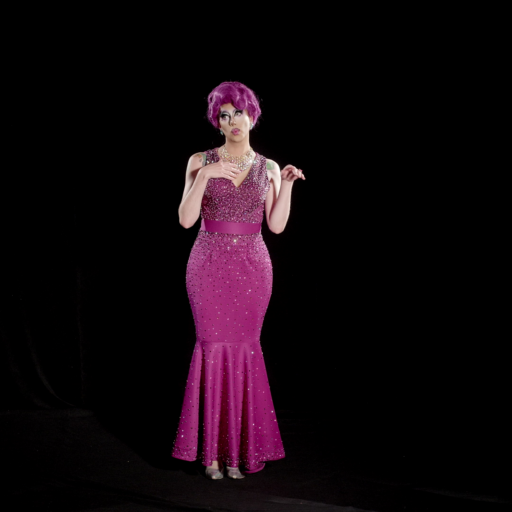

In [7]:
to_pil(dataset[111]["images"])

In [16]:
dataset[33]["poses"]

tensor([9.6199e+02, 5.0198e+02, 8.9894e-01, 9.6802e+02, 6.7895e+02, 9.0475e-01,
        8.2634e+02, 6.7889e+02, 8.5996e-01, 6.1989e+02, 8.0270e+02, 8.3858e-01,
        4.0154e+02, 8.8531e+02, 8.3145e-01, 1.1154e+03, 6.8471e+02, 8.5633e-01,
        1.3159e+03, 8.1447e+02, 8.5631e-01, 1.5224e+03, 9.1492e+02, 8.6607e-01,
        9.6208e+02, 1.1095e+03, 7.9267e-01, 8.7349e+02, 1.1095e+03, 7.6037e-01,
        9.0302e+02, 1.4870e+03, 7.3916e-01, 8.8534e+02, 1.9058e+03, 6.9569e-01,
        1.0505e+03, 1.1095e+03, 7.7568e-01, 1.0328e+03, 1.4870e+03, 7.5001e-01,
        1.0092e+03, 1.9058e+03, 6.3391e-01, 9.2670e+02, 4.7831e+02, 9.0502e-01,
        9.9153e+02, 4.7834e+02, 8.9621e-01, 8.9713e+02, 5.0186e+02, 6.7241e-01,
        1.0445e+03, 5.0780e+02, 8.1439e-01, 1.0092e+03, 2.0003e+03, 4.1967e-01,
        1.0505e+03, 1.9942e+03, 4.4276e-01, 9.9148e+02, 1.9412e+03, 4.5544e-01,
        9.2084e+02, 2.0001e+03, 5.8745e-01, 8.7347e+02, 1.9885e+03, 5.4475e-01,
        9.0301e+02, 1.9412e+03, 5.2726e-

In [13]:
pipeline = ZiziPipeline.from_pretrained("trained-models/zizi-pink-512-44").to("mps")

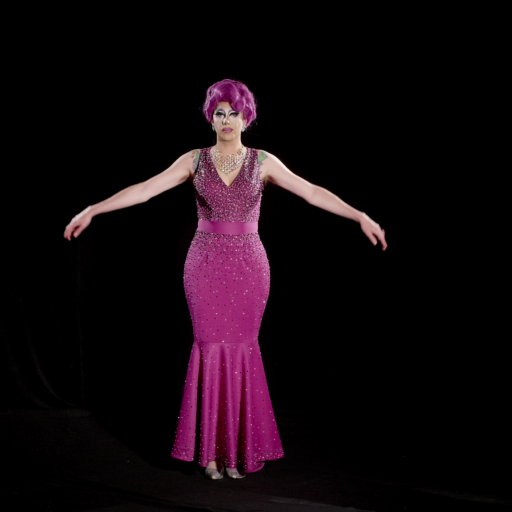

In [8]:
to_pil(dataset[33]["images"])

In [29]:
x = pipeline(dataset[111]["poses"].unsqueeze(0).to("mps"), batch_size=1, num_inference_steps=10).images

  0%|          | 0/10 [00:00<?, ?it/s]

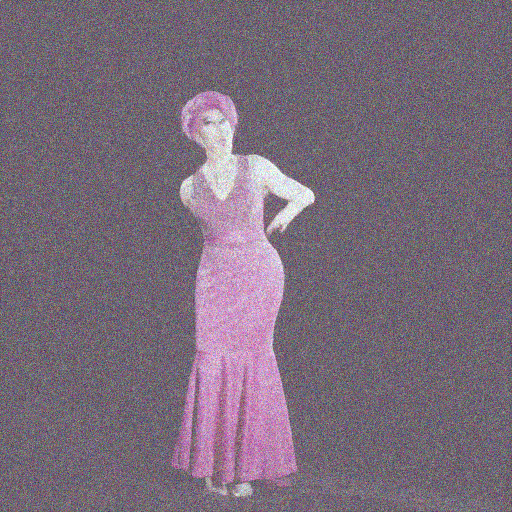

In [30]:
make_grid(x, 1, 1)

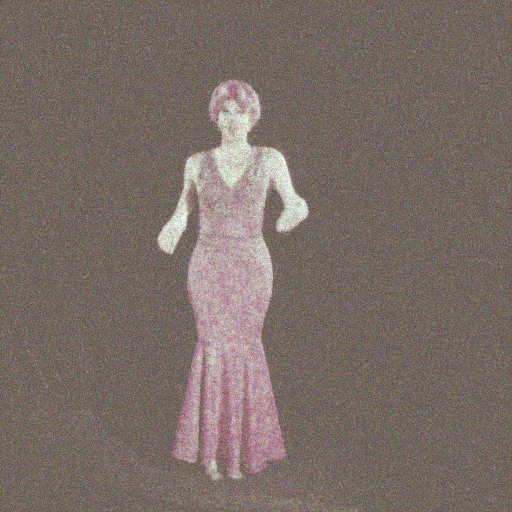

In [28]:
make_grid(x, 1, 1)

In [21]:
close = pipeline(dataset[33]["poses"].unsqueeze(0).to("mps"), batch_size=4, num_inference_steps=25).images

  0%|          | 0/25 [00:00<?, ?it/s]

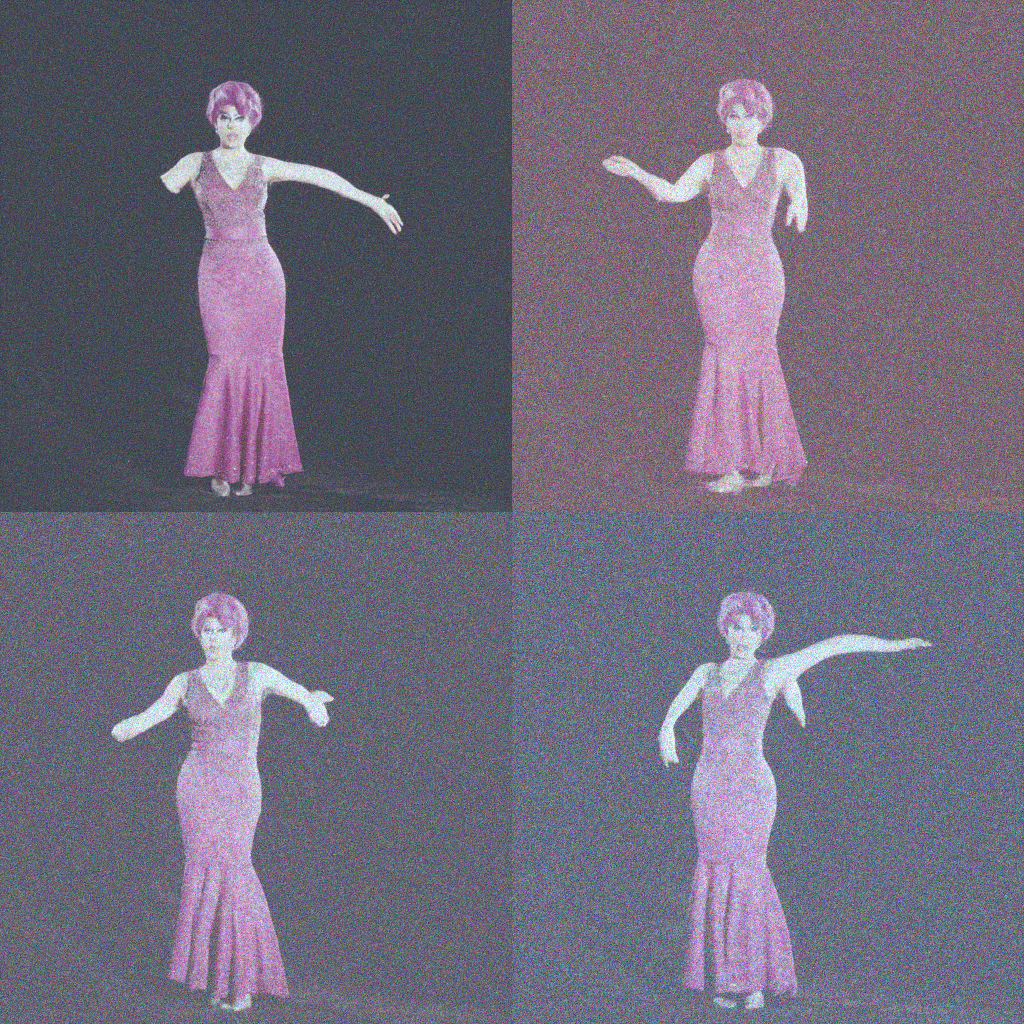

In [22]:
make_grid(close, 2, 2,)